# Hypothesis Testing - Associations

In this lesson, we’ll use hypothesis tests to make inference about population-level associations between two variables.

We will cover four different hypothesis tests:

- Two Sample T-Tests (for an association between a quantitative variable and a binary categorical variable)
- ANOVA and Tukey Tests (for an association between a quantitative variable and a non-binary categorical variable)
- Chi-Square Tests (for an association between two categorical variables)

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

## Two sample t test

A sample dataset with conversion rate across two versions of a website tracked for 30 days.

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/tauseef1234/Datasets/main/data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
Day             30 non-null int64
Conversion_A    30 non-null float64
Conversion_B    30 non-null float64
dtypes: float64(2), int64(1)
memory usage: 800.0 bytes


,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


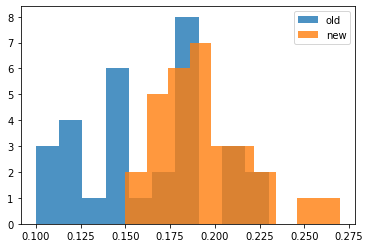

In [3]:
#plot overlapping histograms
plt.hist(df.Conversion_A, alpha=.8, label='old')
plt.hist(df.Conversion_B, alpha=.8, label='new')
plt.legend()
plt.show()

There is a fair amount of overlap, but it does seem like visitors to the new website are spending slightly more time on the site (the orange distribution is shifted slightly to the right of the blue distribution).

In [4]:
tstat, pval = ttest_ind(df.Conversion_A,df.Conversion_B)
print(pval)

0.000363796012828762


## ANOVA

ANOVA tests the null hypothesis that all groups have the same population mean.

The data set contains information on 76 people who undertook one of three diets (referred to as diet A, B and C). There is background information such as age, gender, and height. Now, we need to check if the weight loss means are different by chosing the type of diet plan.

In [5]:
df_diet = pd.read_csv("https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv")
df_diet.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [6]:
df_diet['loss'] = df_diet['pre.weight']-df_diet['weight6weeks']

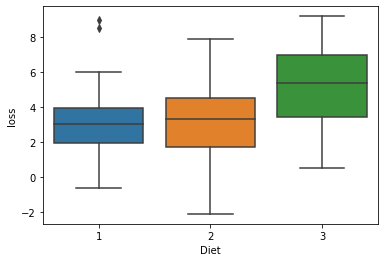

In [7]:
sns.boxplot(data=df_diet, x='Diet', y='loss')
plt.show()

In [8]:
diet1 = df_diet.loss[df_diet.Diet==1]
diet2 = df_diet.loss[df_diet.Diet==2]
diet3 = df_diet.loss[df_diet.Diet==3]

In [9]:
# run ANOVA
fstat,pval = f_oneway(diet1,diet2,diet3)
print(pval)

0.0032290142385893524


Since the p-value is less than <<0.05, we can conclude that the atleast one of the diets has a significantly different weight loss.

## Tukey's range test

Now, if we want to find out which pair of diet plans are different. Then, Tukey's test is useful. Tukey’s range test is similar to running three separate 2-sample t-tests, except that it runs all of these tests simultaneously in order to preserve the type I error rate.

In [10]:
# run tukey's test
tukey_results = pairwise_tukeyhsd(df_diet.loss,df_diet.Diet)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.2741    0.9 -1.8806 1.3325  False
     1      3   1.8481 0.0201  0.2416 3.4547   True
     2      3   2.1222 0.0048  0.5636 3.6808   True
---------------------------------------------------


For every comparison where `reject` is `True`, we reject the null hypothesis and conclude that there is significant difference between two groups. Using the above result, we can conclude that the weight loss using diet plans 1 & 3 and diet plan 2 & 3 differ significantly.

### Assumptions of T-tests, ANOVA and Tukey

1. The observations should be independently randomly sampled from the population.
2. The standard deviations of the groups should be equal.
3. The data should be normally distributed. However, this is not a problem when the sample size is large.
4. The groups created by the categorical variable must be independent.

## Chi-Square Test

If we want to understand whether the outcomes of two categorical variables are associated, we can use a Chi-Square test.

In [11]:
df_bike = pd.read_csv("https://raw.githubusercontent.com/Safa1615/BIKE-RENTAL-COUNT/master/day.csv")
df_bike.info()
df_bike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
# create contingency table
table = pd.crosstab(df_bike.holiday,df_bike.weathersit)
print(table)

weathersit    1    2   3
holiday                 
0           448  241  21
1            15    6   0


In [13]:
# run Chi-Square test and print p-value
chi2,pval,dof,expected = chi2_contingency(table)
print(pval)

0.6008572213448835
